## 부산 5대 범죄 관할구별 발생 시각화

In [1]:
## 필요 라이브러리 사용등록
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = '/Users/gukjinhan/Library/Fonts/NanumGothicCoding-Bold.ttf' # 나눔고딕 코딩사용
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름 조회
rc('font', family = font) # 한글깨짐현상 해결!
rcParams['axes.unicode_minus'] = False # 한글 사용 시 마이너스 표시 깨짐 해결! 

In [3]:
dfBs = bs_crime_22 = pd.read_csv('./data/경찰청 부산광역시경찰청_경찰서별 5대 범죄 발생 현황_20230410.csv', encoding='UTF-8')

In [4]:
dfBs.rename(columns={'성범죄':'성범죄', '경찰서':'관서명'}, inplace=True)
dfBs['연도'] = 2022

In [5]:
dfBs['합계'] = dfBs['살인'] + dfBs['강도'] + dfBs[' 성범죄'] + dfBs['절도'] + dfBs['폭력']

In [6]:
dfBs = dfBs.drop(columns=['구분','연번'])

In [7]:
dfBs.head()

,관서명,살인,강도,성범죄,절도,폭력,연도,합계
0,중부,0,4,38,540,578,2022,1160
1,동래,1,1,99,725,964,2022,1790
2,영도,3,1,19,295,510,2022,828
3,동부,1,3,41,469,595,2022,1109
4,부산진,6,3,222,1989,2318,2022,4538


In [8]:
pd.pivot_table(dfBs, index=['연도', '관서명'], aggfunc='sum').head()

성범죄  강도  살인   절도    폭력    합계
연도   관서명                               
2022 강서     32   1   3  318   442   796
     금정     76   5   3  675   707  1466
     기장     43   1   2  463   587  1096
     남부    105   3   3  887  1405  2403
     동래     99   1   1  725   964  1790

In [9]:
by_year = pd.pivot_table(dfBs, index=['연도'], aggfunc='sum', margins=True).reset_index()
# pivot_table의 옵션에서 중 margins=True를 설정하는 경우 총계가 나타난다.
by_year

/var/folders/gb/b00gj_y55zb3lhxtk9d7s87c0000gn/T/ipykernel_13012/1735940427.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  by_year = pd.pivot_table(dfBs, index=['연도'], aggfunc='sum', margins=True).reset_index()


,연도,성범죄,강도,관서명,살인,절도,폭력,합계
0,2022,1136,36,중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장,42,11378,14338,26930
1,All,1136,36,중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장,42,11378,14338,26930


In [10]:
# 관서별 5대 범죄 총계
TotalCrime= dfBs.groupby(['관서명']).sum().drop(columns=['연도', '합계'])
TotalCrime.head()

,살인,강도,성범죄,절도,폭력
관서명,,,,,
강서,3,1,32,318,442
금정,3,5,76,675,707
기장,2,1,43,463,587
남부,3,3,105,887,1405
동래,1,1,99,725,964


In [11]:
col = TotalCrime.columns
x = TotalCrime[col].values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x.astype(float))
cri_nor = pd.DataFrame(x_scaled, columns=col, index=TotalCrime.index)
cri_nor.head()

,살인,강도,성범죄,절도,폭력
관서명,,,,,
강서,0.500000,0.0,0.064039,0.013577,0.001065
금정,0.500000,0.8,0.280788,0.224321,0.142173
기장,0.333333,0.0,0.118227,0.099174,0.078275
남부,0.500000,0.4,0.423645,0.349469,0.513845
동래,0.166667,0.0,0.394089,0.253837,0.279020


<Axes: xlabel='관서명'>

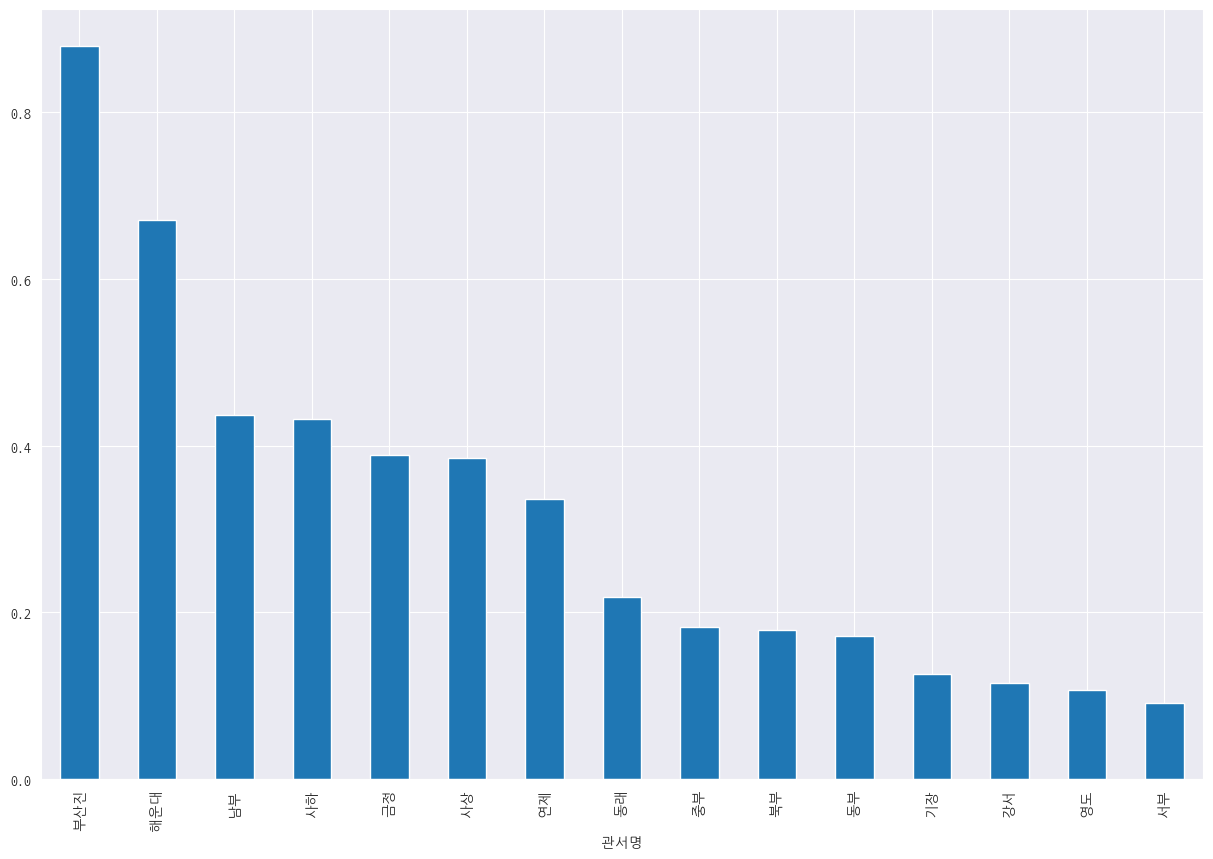

In [12]:
# 범죄별 상대적 위치를 평균화하여 막대그래프로 비교
cri_nor['평균'] = np.sum(cri_nor[col], axis=1) / 5
cri_sort = cri_nor.sort_values('평균', ascending=False)
cri_sort = cri_sort.iloc[:,5]
cri_sort.plot.bar(figsize=(15,10))

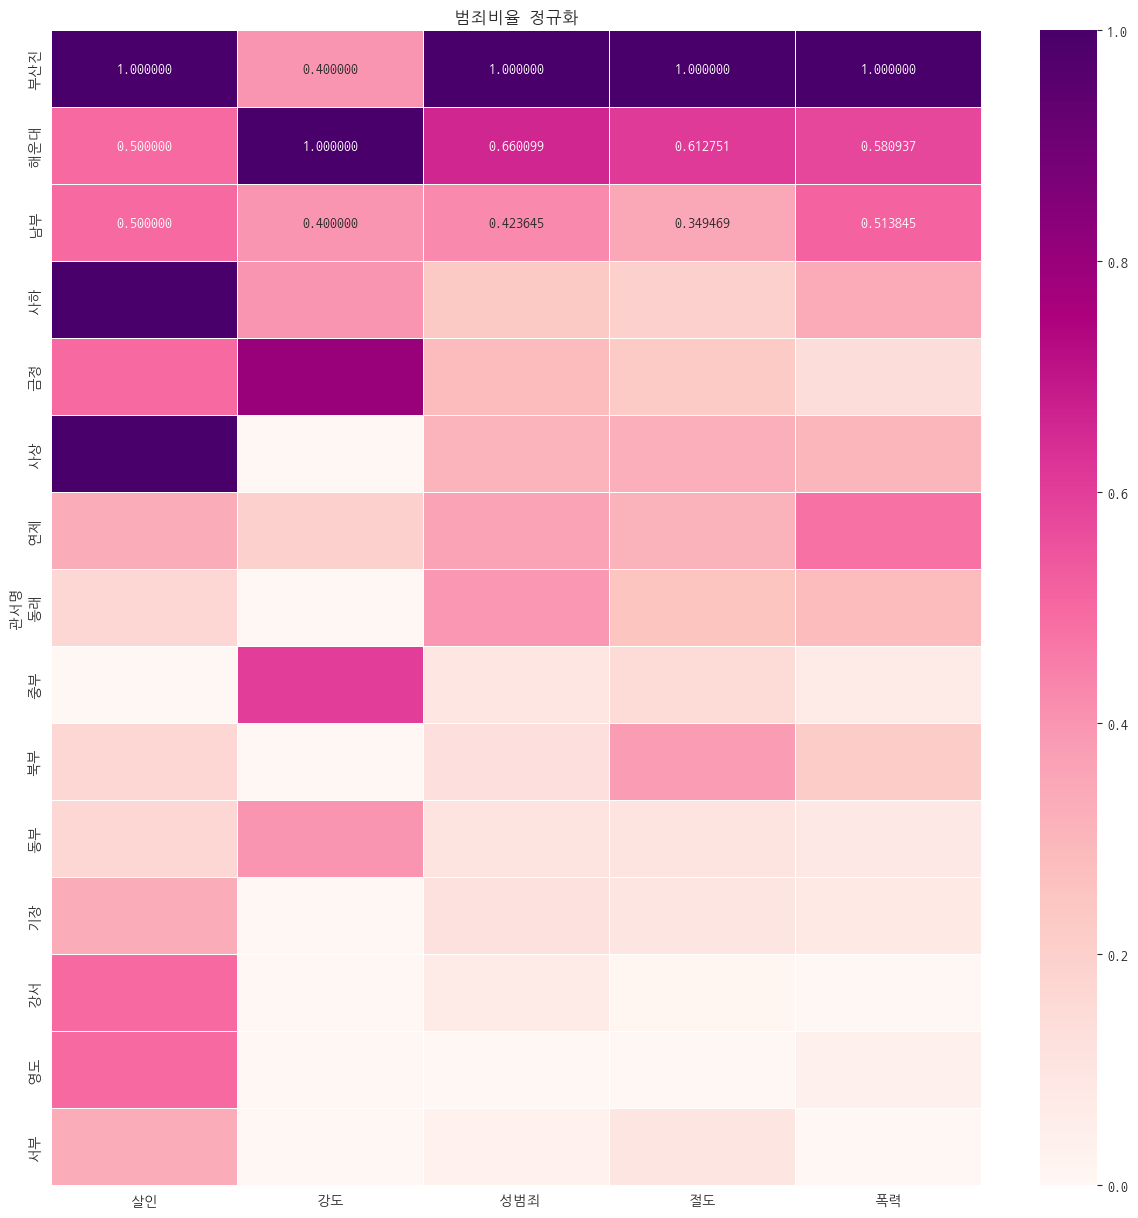

In [13]:
# 히트맵으로 MinMaxScaler된 값을 표현한다.
crime_norm_sort = cri_nor.sort_values(by='평균', ascending=False)
plt.figure(figsize=(15, 15))
sns.heatmap(crime_norm_sort[col], annot=True, fmt='f', linewidth=.5, cmap='RdPu')
plt.title('범죄비율 정규화')
plt.show()

# 부산진구가 살인을 제외하고 가장 높은 범죄율을 보인다.

In [14]:

# 그렇다면 이것은 인구수가 많은 지역이기 때문인가?
# 만명 당 범죄 횟수를 구해 인구 대비 범죄율을 확인해본다.
# 수영구만 관할 경찰서가 따로 없다.
# 망미동, 수영동은 연제경찰서 관할이며 광안동, 남천동, 민락동은 남부경찰서 관할이라고 한다 -나무위키-
# 단순하게 수영구의 인구를 5개 동으로 나눠서 관할인 연제구와 남구에 비중대로 배분한다.

# 관할구 컬럼을 배정한다.
TotalCrime['관할구'] = ['강서구', '금정구', '기장군', '남구', '동래구', '동구', '부산진구', '북구', '사상구', '사하구', '서구', '연제구', '영도구', '중구', '해운대구']
TotalCrime.head()


,살인,강도,성범죄,절도,폭력,관할구
관서명,,,,,,
강서,3,1,32,318,442,강서구
금정,3,5,76,675,707,금정구
기장,2,1,43,463,587,기장군
남부,3,3,105,887,1405,남구
동래,1,1,99,725,964,동래구


In [15]:
# 행정구역별 인구수 데이터를 불러온다.
pop_df = pd.read_excel('./data/행정구역별인구수.xlsx', header=1)
pop_df['행정구역(시군구)별'] = pop_df['행정구역(시군구)별'].str.strip()
pop_df.columns # 컬럼명을 확인해서 데이터프레임 병합(merge)에 사용한다.

TotalCrime = pd.merge(TotalCrime, pop_df[['행정구역(시군구)별', '총인구수 (명)']],
                     left_on='관할구', right_on='행정구역(시군구)별', how='inner')

# del TotalCrime['행정구역(시군구)별'] # 중복 컬럼을 제거했다.


/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [16]:
pop_df= pop_df.set_index('행정구역(시군구)별')
sy_num = pop_df.loc['수영구', '총인구수 (명)']

TotalCrime.set_index('관할구', inplace=True)
TotalCrime

TotalCrime.loc['연제구', '총인구수 (명)'] += int(sy_num*(2/5))
TotalCrime.loc['남구', '총인구수 (명)'] += int(sy_num*(3/5))

TotalCrime_per = TotalCrime.iloc[:,:5]

TotalCrime_per = TotalCrime_per / \
    TotalCrime['총인구수 (명)'][:, None]*2500/4
TotalCrime_per # 10,000명 당 범죄 발생 수(4년 평균)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.